In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import random

In [2]:
def readTestImages():
    ImagesArray = []
    jpg =".jpg"
    path = "Train/"
    for i in range(1,2401):
        name= str(i)
        name = name + jpg
        name = path + name
#         img = Image.open(name)
        img = mpimg.imread(name)
        np_img = np.array(img).flatten()     #Flattened each Image from 2D Array to 1D array
        ImagesArray.append(np_img)
        
    for i in range(0,2400):
        for j in range(0,784):
            if(ImagesArray[i][j] >140):
                ImagesArray[i][j]=1
            else:
                ImagesArray[i][j]=0
    
    
    return ImagesArray

In [ ]:
readTestImages()

In [3]:
def Init():
    ImagesArray=readTestImages()
    Us=np.zeros((10,784))
    U0Index=random.randint(0,2400)
    U0 = ImagesArray[U0Index]
    Us[0]=U0
    ImagesArray = np.delete(ImagesArray, U0Index, axis=0)
    
    for j in range(1,10):
        dist=np.zeros(2400)
        for i in range(0,ImagesArray.shape[0]):
            dists=np.linalg.norm(ImagesArray[i]-Us[j-1])
            dist[i]=dists
        Us[j]=ImagesArray[np.argmax(dist)]
        ImagesArray = np.delete(ImagesArray, np.argmax(dist), axis=0)
    #    print(np.argmax(dist))
        
    return Us

In [ ]:
Init()

In [22]:
def KmeansZiad():
    Us=Init()
    ImagesArray=readTestImages()
    clusters = [[] for i in range(10)]
    
    for i in range(0,2400):
        dist=np.zeros(10)
        for j in range(0,10):
            dists=np.linalg.norm(ImagesArray[i]-Us[j])
            dist[j]=dists
        clusters[np.argmin(dist)].append(ImagesArray[i])
            
    for i in range(0,10):
        Us[i]=np.mean(clusters[i],axis=0)
    
    NotConverged=True
    count=0
    
    while(NotConverged):
        member=[]
        clusters = [[] for i in range(10)]
        for i in range(0,2400):
            dist=np.zeros(10)
            for j in range(0,10):
                dists=np.linalg.norm(ImagesArray[i]-Us[j])
                dist[j]=dists
            clusters[np.argmin(dist)].append(ImagesArray[i])
            member.append(np.argmin(dist))
        newUs=[]
        HasChanged=False
        for i in range(0,10):
            newUs.append(np.mean(clusters[i], axis = 0))
            if(not(np.array_equal(Us[i],newUs[i]))):
                Us[i]=newUs[i]
                HasChanged=True
        NotConverged=HasChanged
        #print(count)
        count += 1
    return member

In [15]:
def Kmeans():
    Us=Init()
    ImagesArray=readTestImages()
    clusters = [[] for i in range(10)]
    
    for i in range(0,2400):
        dist=np.zeros(2400)
        for j in range(1,10):
            dists=np.linalg.norm(ImagesArray[i]-Us[j-1])
            dist[j]=dists
        clusters[np.argmin(dist)].append(ImagesArray[i])
            
    for i in range(0,10):
        Us[i]=np.mean(clusters[i],axis=0)
    
    NotConverged=True
    
    counter=0
    for i in range(0,500):
        member=[]
        clusters = [[] for i in range(10)]
        for i in range(0,2400):
            dist=np.zeros(2400)
            for j in range(1,10):
                dists=np.linalg.norm(ImagesArray[i]-Us[j])
                dist[j]=dists
            clusters[np.argmin(dist)].append(ImagesArray[i])
            member.append(np.argmin(dist))
        newUs=[]
        HasChanged=False
        for i in range(0,10):
            newUs.append(np.mean(clusters[i], axis = 0))
            if(not(np.array_equal(Us[i],newUs[i]))):
                Us[i]=newUs[i]
                HasChanged=True
        NotConverged=HasChanged
        counter+=1
        
    return member
                
            

In [18]:
KmeansZiad()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


[5,
 5,
 2,
 5,
 1,
 1,
 5,
 1,
 3,
 5,
 5,
 1,
 5,
 1,
 1,
 1,
 5,
 1,
 1,
 5,
 5,
 1,
 1,
 3,
 3,
 1,
 6,
 3,
 1,
 1,
 0,
 1,
 1,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 1,
 1,
 1,
 5,
 5,
 1,
 1,
 1,
 5,
 5,
 5,
 1,
 1,
 4,
 2,
 5,
 3,
 1,
 5,
 1,
 5,
 5,
 5,
 5,
 6,
 5,
 1,
 5,
 5,
 5,
 5,
 9,
 5,
 5,
 5,
 2,
 5,
 5,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 4,
 5,
 3,
 9,
 5,
 5,
 1,
 5,
 3,
 5,
 1,
 1,
 5,
 1,
 8,
 5,
 3,
 1,
 1,
 5,
 1,
 5,
 3,
 9,
 1,
 0,
 5,
 5,
 5,
 2,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 1,
 5,
 1,
 2,
 1,
 2,
 5,
 4,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 1,
 2,
 5,
 1,
 1,
 5,
 3,
 1,
 1,
 3,
 5,
 1,
 5,
 1,
 1,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 5,
 5,
 5,
 1,
 1,
 1,
 5,
 5,
 8,
 5,
 8,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 2,
 5,
 5,
 5,
 1,
 1,
 5,
 1,
 5,
 5,
 1,
 5,
 1,
 2,
 1,
 3,
 5,
 1,
 1,
 1,
 6,
 1,
 3,
 1,
 5,
 5,
 1,
 8,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 1,
 5,
 3,
 5,
 1,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,


In [24]:
def draw(ClusterRes,ImagesArray):
    SumArray=[]
    minSum=0
    minSumi=0
    for i in range(0,30):
        sumz=0
        for j in range(0,2400):
            for z in range(j+1,2400):
                 if(ClusterRes[i][j] == ClusterRes[i][z]):
                        sumz += np.linalg.norm(ImagesArray[i] - ImagesArray[j])
        SumArray.append(sumz)
        if(i==0):
            minSum=sumz
        elif(sumz<minSum):
            minSum=sumz
            minSumi=i
    cluster= np.zeros(10)
    LastArray=[]
    for i in range(0,2400):
        cluster[ClusterRes[minSumi][i]] +=1
        if((i+1)%240 == 0):
            LastArray.append(cluster[np.argmax(cluster)])
            cluster = np.zeros(10)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = ['0','1','2','3','4','5','6','7','8','9']
    ax.bar(langs,LastArray)
    plt.savefig('Counts.jpg')

In [25]:
def main():
    ImagesArray= readTestImages()
    ClusterRes=[]
    
    for i in range(0,30):
        results=KmeansZiad()
        ClusterRes.append(results)
    draw(ClusterRes,ImagesArray)

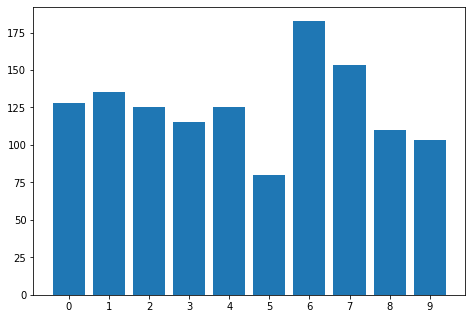

In [26]:
main()